<h1 style="text-align:center; color:#1f4e79;">
    Financial Ratio Analysis and Peer Comparison
</h1>

<h3 style="text-align:left; color:#E95A1D;">
    UltraTech Cement Ltd
</h3>

<h6 style="text-align:left; color:grey;">
    (NSE: ULTRACEMCO | BSE: 532538)
</h6>


<h4 style="color:black;">
    About the Company
</h4>

<p style="text-align:justify;">
UltraTech Cement Limited is India's largest cement manufacturer and a flagship company of the Aditya Birla Group. 
The company has a strong pan-India presence with integrated cement plants, grinding units, and bulk terminals, 
serving infrastructure, housing, and commercial construction segments through a diversified product portfolio 
and an extensive distribution network.
</p>


<h4 style="color:black;">
    Scope of Analysis
</h4>

<ul>
  <li>Income statement analysis and profitability margins</li>
  <li>Return ratios and capital structure assessment</li>
  <li>Cash flow quality and earnings sustainability</li>
  <li>Peer operating and return comparison</li>
  <li>Peer valuation multiples analysis</li>
  <li>Trend and peer comparison visualisations</li>
</ul>


<p style="color:grey; font-size:12px;">
    Note: Financial data compiled from publicly available disclosures via Screener. 
    Analysis performed using Python (Pandas, NumPy, Matplotlib).
    <br>
    Note: This analysis has been prepared solely for academic and learning purposes.
</p>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

In [2]:
import pandas as pd
import os

# Excel file path
excel_file = "ultratechcement_data.xlsx"

# Output folder
output_folder = "ultratechcement_data"

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Read all sheets
all_sheets = pd.read_excel(excel_file, sheet_name=None)

# Convert each sheet to CSV inside the folder
for sheet_name, df in all_sheets.items():
    clean_sheet_name = sheet_name.lower().replace(" ", "_").replace("&", "and")
    csv_path = os.path.join(output_folder, f"ultratech_{clean_sheet_name}.csv")
    df.to_csv(csv_path, index=False)
    print(f"Saved: {csv_path}")

Saved: ultratechcement_data\ultratech_metadata.csv
Saved: ultratechcement_data\ultratech_income_statement.csv
Saved: ultratechcement_data\ultratech_balance_sheet.csv
Saved: ultratechcement_data\ultratech_cash_flow_stat.csv
Saved: ultratechcement_data\ultratech_peer_ratio_inputs.csv
Saved: ultratechcement_data\ultratech_peer_valuation_inputs.csv
Saved: ultratechcement_data\ultratech_raw_data.csv


<h3 style="color:#1f4e79;">
    Income Statement Analysis:
</h3>

<h4 style="color:#4f4f4f;">
    Profitability Margins Calculation
</h4>

In [2]:
# Load income statement data
income_df = pd.read_csv("ultratechcement_data/ultratech_income_statement.csv")

# View data
income_df

,Year,Revenue,EBITDA,EBIT,Net_Profit
0,2021,44725.80,11567.91,8867.68,4843.33
1,2022,52598.83,11514.35,8799.60,6664.83
2,2023,63239.98,10619.85,7731.86,4566.29
3,2024,70908.14,12978.56,9833.26,6447.00
4,2025,75955.13,12796.88,8781.93,5642.90


In [7]:
# Calculate profitability margins
income_df["EBITDA_Margin"] = income_df["EBITDA"] / income_df["Revenue"]
income_df["EBIT_Margin"] = income_df["EBIT"] / income_df["Revenue"]
income_df["Net_Profit_Margin"] = income_df["Net_Profit"] / income_df["Revenue"]

income_df

,Year,Revenue,EBITDA,EBIT,Net_Profit,EBITDA_Margin,EBIT_Margin,Net_Profit_Margin
0,2021,44725.80,11567.91,8867.68,4843.33,0.258641,0.198268,0.108289
1,2022,52598.83,11514.35,8799.60,6664.83,0.218909,0.167296,0.126711
2,2023,63239.98,10619.85,7731.86,4566.29,0.167929,0.122262,0.072206
3,2024,70908.14,12978.56,9833.26,6447.00,0.183033,0.138676,0.090920
4,2025,75955.13,12796.88,8781.93,5642.90,0.168479,0.115620,0.074293


In [9]:
# Convert Margins to Percentage
margin_cols = ["EBITDA_Margin", "EBIT_Margin", "Net_Profit_Margin"]

income_df[margin_cols] = income_df[margin_cols] * 100

income_df

,Year,Revenue,EBITDA,EBIT,Net_Profit,EBITDA_Margin,EBIT_Margin,Net_Profit_Margin
0,2021,44725.80,11567.91,8867.68,4843.33,25.864065,19.826767,10.828940
1,2022,52598.83,11514.35,8799.60,6664.83,21.890886,16.729650,12.671061
2,2023,63239.98,10619.85,7731.86,4566.29,16.792937,12.226221,7.220575
3,2024,70908.14,12978.56,9833.26,6447.00,18.303343,13.867604,9.092045
4,2025,75955.13,12796.88,8781.93,5642.90,16.847947,11.561997,7.429255


In [10]:
# Create a Clean Ratio Table
profitability_table = income_df[
    ["Year", "EBITDA_Margin", "EBIT_Margin", "Net_Profit_Margin"]
].round(2)

profitability_table

,Year,EBITDA_Margin,EBIT_Margin,Net_Profit_Margin
0,2021,25.86,19.83,10.83
1,2022,21.89,16.73,12.67
2,2023,16.79,12.23,7.22
3,2024,18.30,13.87,9.09
4,2025,16.85,11.56,7.43


<p style="color:grey; font-size:11px; font-style:italic;">
Note: Margins are expressed in percentage terms (%).
</p>


<h4 style="color:#4f4f4f;">
    Profitability Margins – Trend Analysis
</h4>


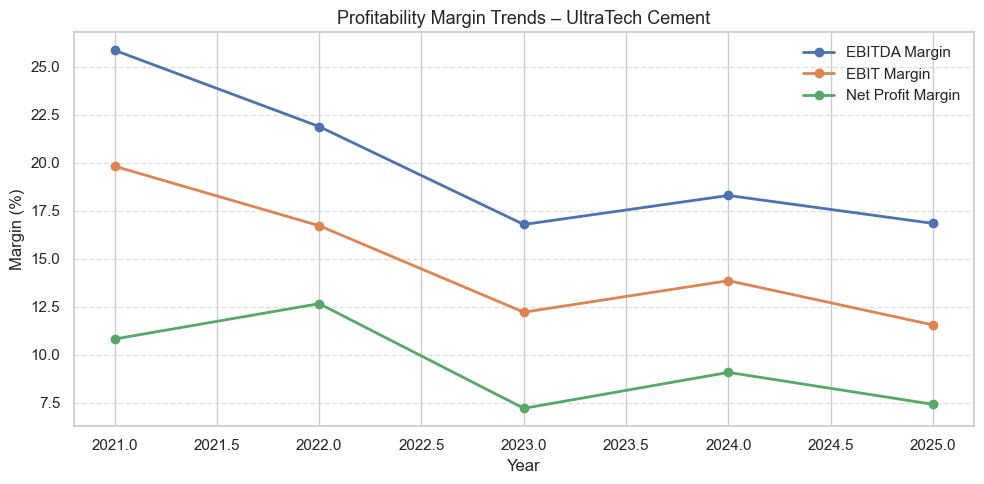

In [14]:
# Visualization: Visualize Margins Over Time
plt.figure(figsize=(10, 5))

plt.plot(income_df["Year"], income_df["EBITDA_Margin"],
         marker="o", linewidth=2, label="EBITDA Margin")

plt.plot(income_df["Year"], income_df["EBIT_Margin"],
         marker="o", linewidth=2, label="EBIT Margin")

plt.plot(income_df["Year"], income_df["Net_Profit_Margin"],
         marker="o", linewidth=2, label="Net Profit Margin")

plt.title("Profitability Margin Trends – UltraTech Cement", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Margin (%)")

plt.legend(frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

<h3 style="color:#1f4e79;">
    Balance Sheet Analysis:
</h3>

<h4 style="color:#4f4f4f;">
    Return & Capital Structure Ratios – Calculation
</h4>


In [17]:
# Load balance sheet data
balance_df = pd.read_csv("ultratechcement_data/ultratech_balance_sheet.csv")

balance_df


,Year,Total_Assets,Total_Equity,Total_Debt
0,2021,86176.35,44174.68,21719.4
1,2022,83811.44,50435.27,11298.8
2,2023,91380.40,54324.54,11057.7
3,2024,100797.11,60227.48,11403.0
4,2025,133632.06,70706.77,24102.2


In [19]:
# Prepare Net Profit (Linking Statements),ROE & ROA must use Net Profit from income statement.
net_profit_df = income_df[["Year", "Net_Profit"]]
net_profit_df


,Year,Net_Profit
0,2021,4843.33
1,2022,6664.83
2,2023,4566.29
3,2024,6447.00
4,2025,5642.90


In [23]:
# Merge Income Statement & Balance Sheet
bs_merged = pd.merge(
    balance_df,
    net_profit_df,
    on="Year",
    how="inner"
)

bs_merged


,Year,Total_Assets,Total_Equity,Total_Debt,Net_Profit
0,2021,86176.35,44174.68,21719.4,4843.33
1,2022,83811.44,50435.27,11298.8,6664.83
2,2023,91380.40,54324.54,11057.7,4566.29
3,2024,100797.11,60227.48,11403.0,6447.00
4,2025,133632.06,70706.77,24102.2,5642.90


In [59]:
# merge balance sheet with net profit using Year
net_profit_df = income_df[["Year", "Net_Profit"]]
bs_merged = pd.merge(balance_df, net_profit_df, on="Year", how="inner")

# calculate return ratios (kept in normal ratio form)
bs_merged["ROE"] = bs_merged["Net_Profit"] / bs_merged["Total_Equity"]
bs_merged["ROA"] = bs_merged["Net_Profit"] / bs_merged["Total_Assets"]

# convert ROE and ROA into percentage
bs_merged[["ROE", "ROA"]] = bs_merged[["ROE", "ROA"]] * 100

# calculate leverage ratios (kept in x)
bs_merged["Debt_to_Equity"] = bs_merged["Total_Debt"] / bs_merged["Total_Equity"]
bs_merged["Debt_to_Assets"] = bs_merged["Total_Debt"] / bs_merged["Total_Assets"]

# format floats for clean display (no scientific notation)
pd.options.display.float_format = "{:.2f}".format

# display final balance sheet ratios
bs_merged[["Year", "ROE", "ROA", "Debt_to_Equity", "Debt_to_Assets"]]


,Year,ROE,ROA,Debt_to_Equity,Debt_to_Assets
0,2021,10.96,5.62,0.49,0.25
1,2022,13.21,7.95,0.22,0.13
2,2023,8.41,5.00,0.20,0.12
3,2024,10.70,6.40,0.19,0.11
4,2025,7.98,4.22,0.34,0.18


<p style="color:grey; font-size:11px; font-style:italic;">
Note: ROE and ROA are expressed in percentage terms (%), while Debt / Equity & Debt / Assets are expressed in x. Ratios are calculated using year-end balance sheet figures.
</p>

<h4 style="color:#4f4f4f;">
Return & Capital Structure – Trend Analysis
</h4>


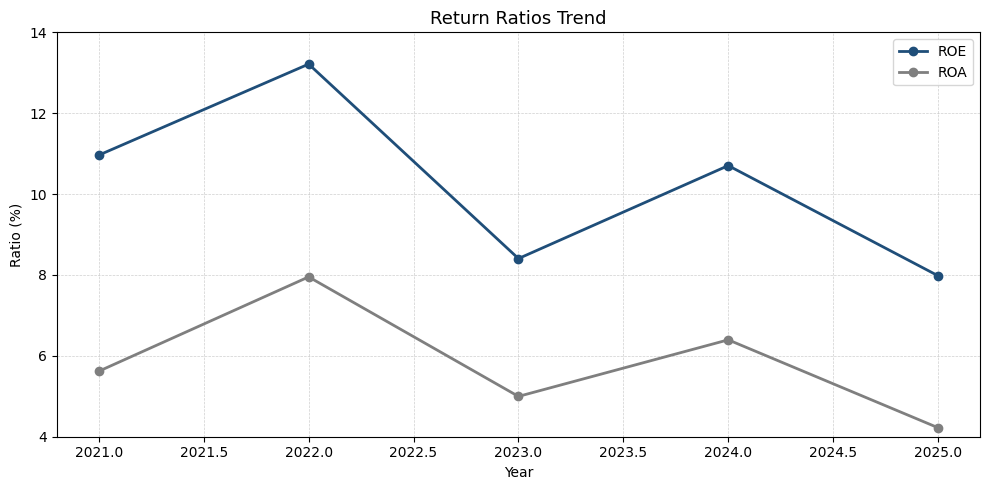

In [66]:
# Line Chart: Return Ratios ( ROE &ROA )
plt.figure(figsize=(10, 5))

plt.plot(
    bs_merged["Year"], bs_merged["ROE"],
    marker="o", linewidth=2, label="ROE",
    color="#1f4e79"   # blue    
)

plt.plot(
    bs_merged["Year"], bs_merged["ROA"],
    marker="o", linewidth=2, label="ROA",
    color="#7f7f7f"   # grey
)

# fix y-axis range to focus on meaningful return band
plt.ylim(4, 14)

plt.title("Return Ratios Trend", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Ratio (%)")

# light dashed gridlines for readability
plt.grid(
    True,
    linestyle="--",
    linewidth=0.5,
    alpha=0.6
)

plt.legend()
plt.tight_layout()
plt.show()


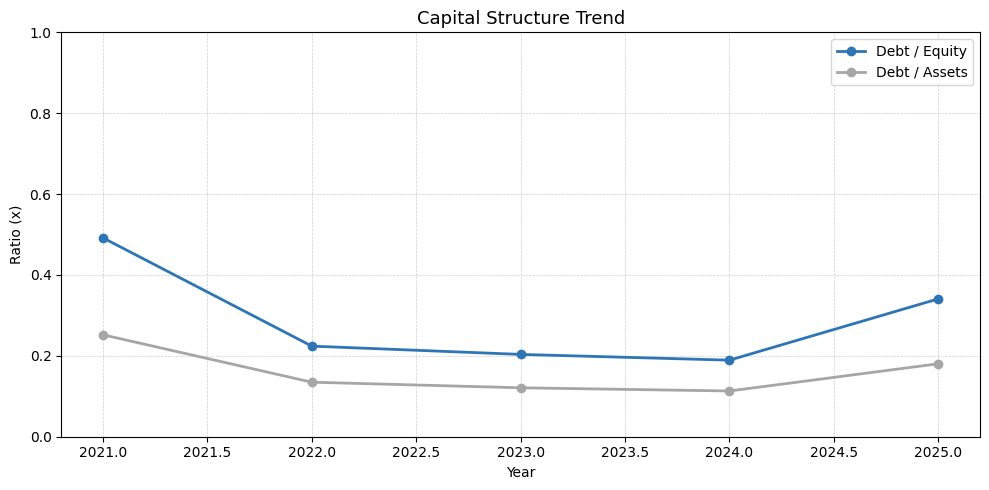

In [70]:
# Debt / Equity & Debt / Assets (Leverage Ratios)
plt.figure(figsize=(10, 5))

plt.plot(
    bs_merged["Year"], bs_merged["Debt_to_Equity"],
    marker="o", linewidth=2, label="Debt / Equity",
    color="#2e75b6"   # IC-style blue
)

plt.plot(
    bs_merged["Year"], bs_merged["Debt_to_Assets"],
    marker="o", linewidth=2, label="Debt / Assets",
    color="#a6a6a6"   # grey
)

# fix y-axis range for leverage (adjust if needed)
plt.ylim(0, 1.0)

plt.title("Capital Structure Trend", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Ratio (x)")

# light dashed gridlines for point readability
plt.grid(
    True,
    linestyle="--",
    linewidth=0.5,
    alpha=0.6
)

plt.legend()
plt.tight_layout()
plt.show()


<h3 style="color:#1f4e79;">
    Cash Flow Quality Analysis:
</h3>

<h4 style="color:#4f4f4f;">
  Operating Cash Flow and Net Profit – Comparison
</h4>


In [72]:
# load cash flow statement
cashflow_df = pd.read_csv("ultratechcement_data/ultratech_cash_flow_stat.csv")

# format numbers for clean display
pd.options.display.float_format = "{:.2f}".format

# display full cash flow statement
cashflow_df


,Year,CFO,CFI,CFF,NCF
0,2021,12500.43,-8856.15,-4356.47,-712.19
1,2022,9283.24,2256.54,-12497.93,-958.15
2,2023,9068.51,-7187.68,-1631.00,249.83
3,2024,10897.54,-8788.68,-1925.65,183.21
4,2025,10673.43,-15835.56,5075.76,-86.37


In [77]:
# extract net profit from income statement
net_profit_df = income_df[["Year", "Net_Profit"]]

# merge cash flow and net profit on Year
cf_merged = pd.merge(cashflow_df, net_profit_df, on="Year", how="inner")

# calculate cash flow quality ratio
cf_merged["CFO_to_Net_Profit"] = cf_merged["CFO"] / cf_merged["Net_Profit"]

# display cash quality table
cf_merged[["Year", "CFO", "Net_Profit", "CFO_to_Net_Profit"]]


,Year,CFO,Net_Profit,CFO_to_Net_Profit
0,2021,12500.43,4843.33,2.58
1,2022,9283.24,6664.83,1.39
2,2023,9068.51,4566.29,1.99
3,2024,10897.54,6447.00,1.69
4,2025,10673.43,5642.90,1.89


<h4 style="color:#4f4f4f;">
    Cash Flow Quality – Trend Analysis
</h4>


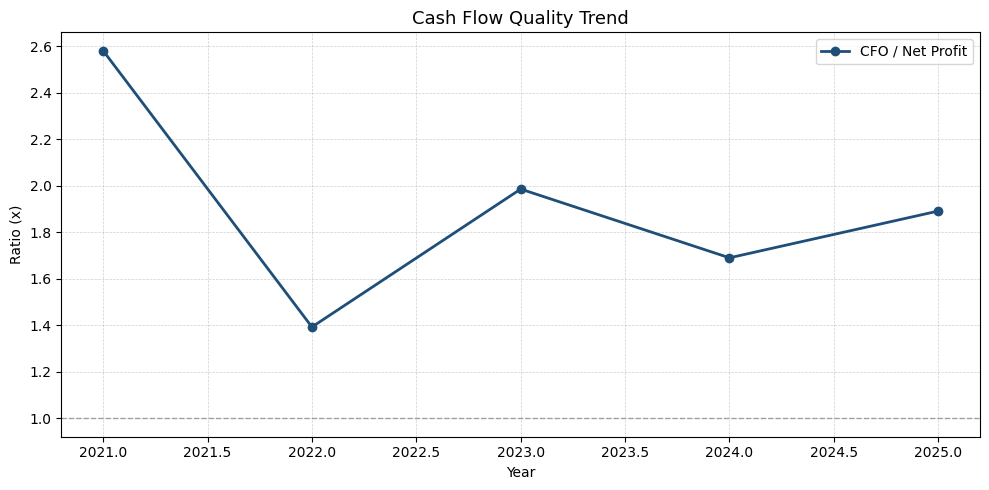

In [74]:
# Line Chart: CFO/Net profit
plt.figure(figsize=(10, 5))

plt.plot(
    cf_merged["Year"], cf_merged["CFO_to_Net_Profit"],
    marker="o", linewidth=2,
    color="#1f4e79",
    label="CFO / Net Profit"
)

plt.axhline(
    y=1.0,
    color="grey",
    linestyle="--",
    linewidth=1,
    alpha=0.7
)

plt.title("Cash Flow Quality Trend", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Ratio (x)")

plt.grid(
    True,
    linestyle="--",
    linewidth=0.5,
    alpha=0.6
)

plt.legend()
plt.tight_layout()
plt.show()


<h3 style="color:#1f4e79;">
    Peer Operating & Return Comparison:
</h3>

<h4 style="color:#4f4f4f;">
    Peer Operating and Return Metrics – Comparison
</h4>

<p style="color:grey; font-size:12px;">
Note: Figures represent latest available financials for FY2025. Data sourced from Screener.
</p>


In [75]:
# load peer ratio input data
peer_df = pd.read_csv("ultratechcement_data/ultratech_peer_ratio_inputs.csv")

# format numbers for clean display
pd.options.display.float_format = "{:.2f}".format

# display raw peer financials
peer_df


,Company,Revenue,EBITDA,Net_Profit,Total_Equity,Total_Debt
0,Ultratech Cement,81724.53,15699.86,7297.12,70707,25214.91
1,Ambuja Cement,38772.67,9756.67,7221.58,53444,1270.72
2,Shree Cement,20146.65,5383.15,1722.19,21538,2141.96
3,J K Cements,13415.98,2655.30,1018.44,6089,6509.83
4,Dalmia BharatLtd,14650.00,3243.56,1201.00,17374,7082.00


In [79]:
# calculate peer profitability ratios
peer_df["EBITDA_Margin"] = peer_df["EBITDA"] / peer_df["Revenue"]
peer_df["Net_Profit_Margin"] = peer_df["Net_Profit"] / peer_df["Revenue"]

# calculate peer return ratio
peer_df["ROE"] = peer_df["Net_Profit"] / peer_df["Total_Equity"]

# calculate peer leverage ratio
peer_df["Debt_to_Equity"] = peer_df["Total_Debt"] / peer_df["Total_Equity"]

peer_ratio_table = peer_df[
    [
        "Company",
        "EBITDA_Margin",
        "Net_Profit_Margin",
        "ROE",
        "Debt_to_Equity"
    ]
].round(2)

peer_ratio_table


,Company,EBITDA_Margin,Net_Profit_Margin,ROE,Debt_to_Equity
0,Ultratech Cement,0.19,0.09,0.10,0.36
1,Ambuja Cement,0.25,0.19,0.14,0.02
2,Shree Cement,0.27,0.09,0.08,0.10
3,J K Cements,0.20,0.08,0.17,1.07
4,Dalmia BharatLtd,0.22,0.08,0.07,0.41


In [80]:
peer_ratio_table = peer_df.copy()

# convert margins and ROE to percentage for presentation
peer_ratio_table["EBITDA_Margin"] *= 100
peer_ratio_table["Net_Profit_Margin"] *= 100
peer_ratio_table["ROE"] *= 100

# format display
pd.options.display.float_format = "{:.2f}".format

peer_ratio_table[
    [
        "Company",
        "EBITDA_Margin",
        "Net_Profit_Margin",
        "ROE",
        "Debt_to_Equity"
    ]
]


,Company,EBITDA_Margin,Net_Profit_Margin,ROE,Debt_to_Equity
0,Ultratech Cement,19.21,8.93,10.32,0.36
1,Ambuja Cement,25.16,18.63,13.51,0.02
2,Shree Cement,26.72,8.55,8.00,0.10
3,J K Cements,19.79,7.59,16.73,1.07
4,Dalmia BharatLtd,22.14,8.20,6.91,0.41


In [111]:
# Rename Columns
peer_ratio_table = peer_ratio_table.rename(columns={
    "EBITDA_Margin": "EBITDA Margin (%)",
    "Net_Profit_Margin": "Net Profit Margin (%)",
    "ROE": "ROE (%)",
    "Debt_to_Equity": "Debt / Equity (x)"
})

peer_ratio_table


,Company,Revenue,EBITDA,Net_Profit,Total_Equity,Total_Debt,EBITDA Margin (%),Net Profit Margin (%),ROE (%),Debt / Equity (x)
0,Ultratech Cement,81724.53,15699.86,7297.12,70707,25214.91,19.21,8.93,10.32,0.36
1,Ambuja Cement,38772.67,9756.67,7221.58,53444,1270.72,25.16,18.63,13.51,0.02
2,Shree Cement,20146.65,5383.15,1722.19,21538,2141.96,26.72,8.55,8.00,0.10
3,J K Cements,13415.98,2655.30,1018.44,6089,6509.83,19.79,7.59,16.73,1.07
4,Dalmia BharatLtd,14650.00,3243.56,1201.00,17374,7082.00,22.14,8.20,6.91,0.41


<h4 style="color:#4f4f4f;">
    Peer Operating and Return Metrics – Visual Comparison
</h4>


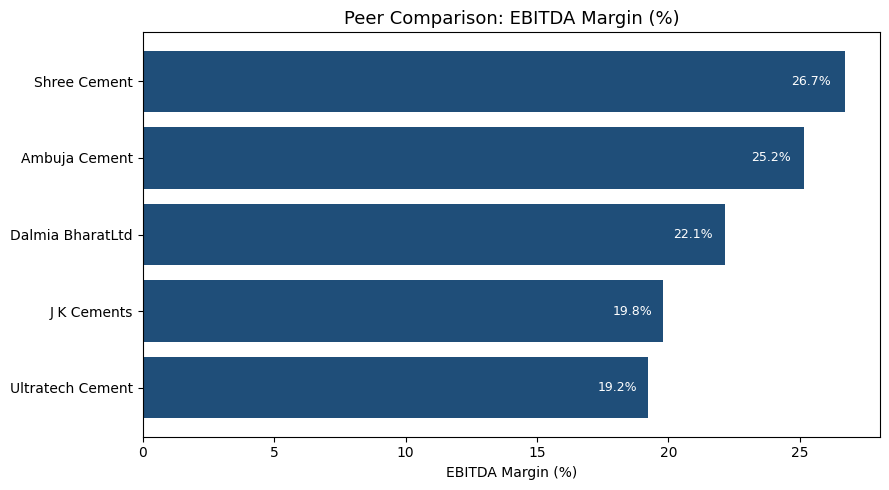

In [95]:
# sort peers by EBITDA Margin (%)
ebitda_sorted = peer_ratio_table.sort_values("EBITDA_Margin", ascending=True)

plt.figure(figsize=(9, 5))

bars = plt.barh(
    ebitda_sorted["Company"],
    ebitda_sorted["EBITDA_Margin"],
    color="#1f4e79"
)

plt.title("Peer Comparison: EBITDA Margin (%)", fontsize=13)
plt.xlabel("EBITDA Margin (%)")
plt.ylabel("")

# add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.98,
        bar.get_y() + bar.get_height()/2,
        f"{width:.1f}%",
        va="center",
        ha="right",
        color="white",
        fontsize=9
    )

plt.grid(False)
plt.tight_layout()
plt.show()


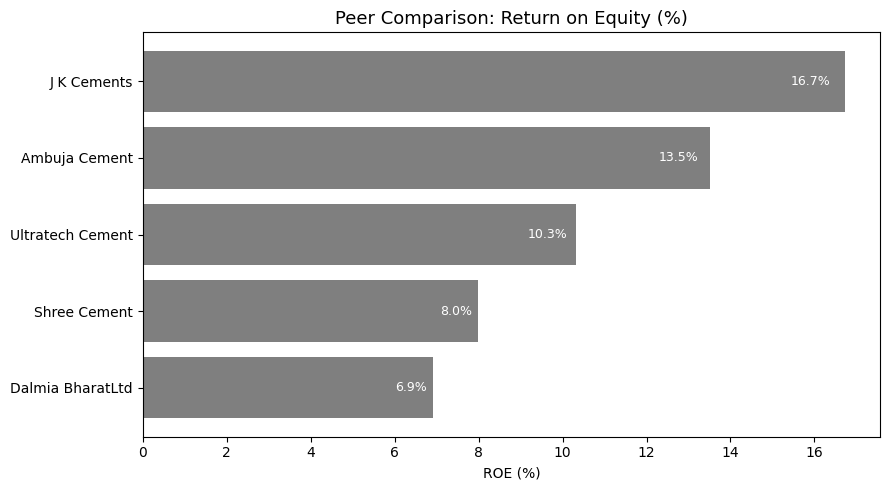

In [94]:
# sort peers by ROE
roe_sorted = peer_ratio_table.sort_values("ROE", ascending=True)

plt.figure(figsize=(9, 5))

bars = plt.barh(
    roe_sorted["Company"],
    roe_sorted["ROE"],
    color="#7f7f7f"   # IC-style grey
)

plt.title("Peer Comparison: Return on Equity (%)", fontsize=13)
plt.xlabel("ROE (%)")
plt.ylabel("")

# add value labels (kept inside visible area)
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.98,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",
        va="center",
        ha="right",
        fontsize=9,
        color="white"
    )

plt.grid(False)
plt.tight_layout()
plt.show()


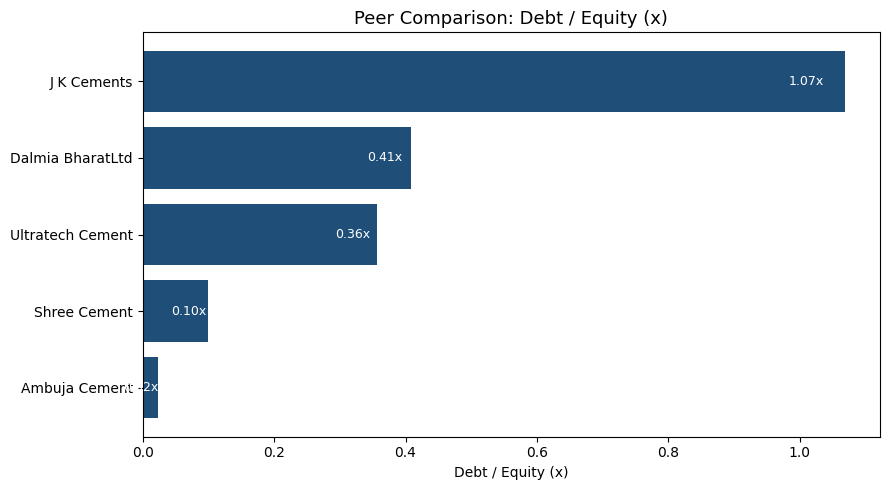

In [97]:
# sort peers by Debt / Equity
de_sorted = peer_ratio_table.sort_values("Debt_to_Equity", ascending=True)

plt.figure(figsize=(9, 5))

bars = plt.barh(
    de_sorted["Company"],
    de_sorted["Debt_to_Equity"],
    color="#1f4e79"   # IC-style blue
)

plt.title("Peer Comparison: Debt / Equity (x)", fontsize=13)
plt.xlabel("Debt / Equity (x)")
plt.ylabel("")

# add value labels (kept inside visible area)
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.97,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}x",
        va="center",
        ha="right",
        fontsize=9,
        color="white"
    )

plt.grid(False)
plt.tight_layout()
plt.show()


<h3 style="color:#1f4e79;">
    Peer Valuation Multiples:
</h3>

<h4 style="color:#4f4f4f;">
    Peer Valuation Multiples – Comparison
</h4>

<p style="color:grey; font-size:12px;">
Note: Valuation multiples are based on latest available financials for FY2025 and are expressed in x.
</p>


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# load peer valuation input data
peer_val_df = pd.read_csv("ultratechcement_data/ultratech_peer_valuation_inputs.csv")

# clean number display
pd.options.display.float_format = "{:.2f}".format

# display raw valuation inputs
peer_val_df


,Company,Market_Cap,Net_Debt,EBITDA,Net_Profit
0,Ultratech Cement,369223.74,23541.59,15699.86,7297.12
1,Ambuja Cement,134218.74,-4901.44,9756.67,7221.58
2,Shree Cement,99274.82,1848.38,5383.15,1722.19
3,J K Cements,42877.15,5140.16,2655.30,1018.44
4,Dalmia BharatLtd,40040.41,6924.00,3243.56,1201.00


In [33]:
# calculate Enterprise Value (EV)
peer_val_df["EV"] = peer_val_df["Market_Cap"] + peer_val_df["Net_Debt"]

# calculate valuation multiples
peer_val_df["EV_to_EBITDA"] = peer_val_df["EV"] / peer_val_df["EBITDA"]
peer_val_df["PE"] = peer_val_df["Market_Cap"] / peer_val_df["Net_Profit"]

peer_valuation_table = peer_val_df[
    [
        "Company",
        "EV_to_EBITDA",
        "PE"
    ]
].round(2)

# Rename Columns
peer_valuation_table = peer_valuation_table.rename(columns={
    "EV_to_EBITDA": "EV / EBITDA (x)",
    "PE": "P/E (x)"
})

peer_valuation_table


,Company,EV / EBITDA (x),P/E (x)
0,Ultratech Cement,25.02,50.60
1,Ambuja Cement,13.25,18.59
2,Shree Cement,18.79,57.64
3,J K Cements,18.08,42.10
4,Dalmia BharatLtd,14.48,33.34


<h4 style="color:#4f4f4f;">
    Peer Valuation Multiples – Visual Comparison
</h4>


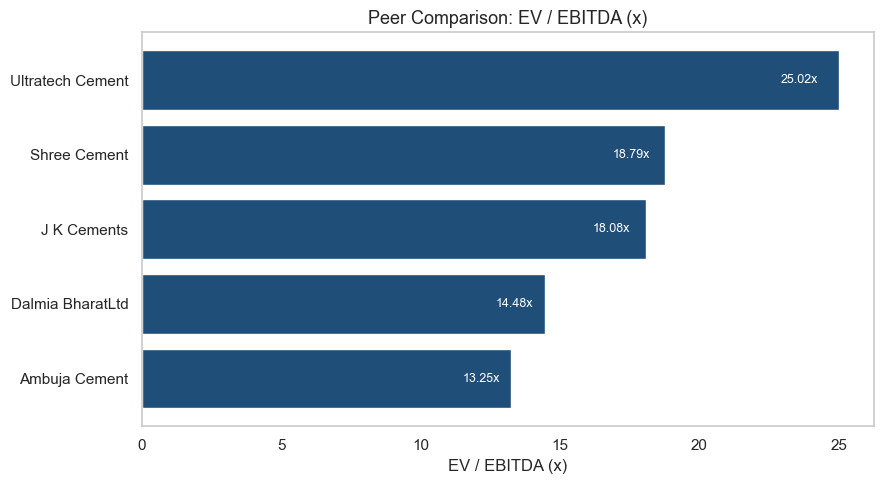

In [44]:
# sort peers by EV / EBITDA
ev_sorted = peer_valuation_table.sort_values("EV / EBITDA (x)", ascending=True)

plt.figure(figsize=(9, 5))

bars = plt.barh(
    ev_sorted["Company"],
    ev_sorted["EV / EBITDA (x)"],
    color="#1f4e79"   # blue
)

plt.title("Peer Comparison: EV / EBITDA (x)", fontsize=13)
plt.xlabel("EV / EBITDA (x)")
plt.ylabel("")

# add value labels INSIDE bars 
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.97,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}x",
        va="center",
        ha="right",
        fontsize=9,
        color="white"
    )

plt.grid(False)
plt.tight_layout()
plt.show()


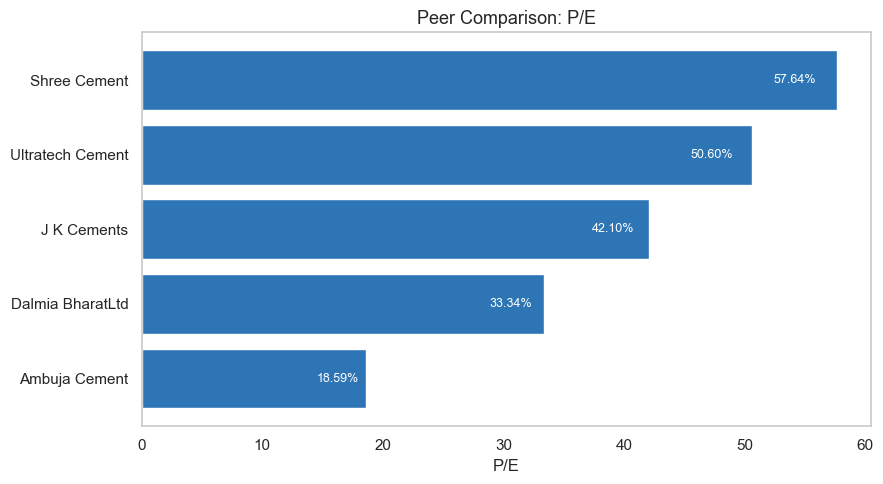

In [43]:
# sort peers by P/E 
pe_sorted = peer_valuation_table.sort_values("P/E (x)", ascending=True)

plt.figure(figsize=(9, 5))

bars = plt.barh(
    pe_sorted["Company"],
    pe_sorted["P/E (x)"],
    color="#2e75b6"   # light blue
)

plt.title("Peer Comparison: P/E", fontsize=13)
plt.xlabel("P/E")
plt.ylabel("")

# add value labels INSIDE bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width * 0.97,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}%",
        va="center",
        ha="right",
        fontsize=9,
        color="white"
    )

plt.grid(False)
plt.tight_layout()
plt.show()


<p style="color:grey; font-size:12px;">
    Note: This analysis has been prepared solely for academic and learning purposes.
</p>
        